In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT
# May 2024

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [3]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
X = X / 255

In [4]:
train_size = 60000
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [5]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [6]:
print('Training set accuracy:', np.round(knn.score(X_train, y_train), 4))
print('Test set accuracy:' , np.round(knn.score(X_test, y_test), 4))

Training set accuracy: 0.9819
Test set accuracy: 0.9688


Dimensionality Reduction using PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)

X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
knn.fit(X_train_reduced, y_train)

KNeighborsClassifier()

In [8]:
print('Training set accuracy:', np.round(knn.score(X_train_reduced, y_train), 4))
print('Test set accuracy:' , np.round(knn.score(X_test_reduced, y_test), 4))

Training set accuracy: 0.986
Test set accuracy: 0.9753


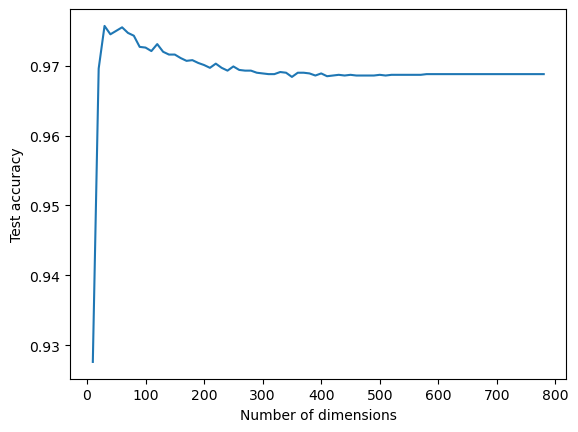

In [9]:
dimensions = range(10, 785, 10)
scores = []

for n_dimensions in dimensions:
    pca = PCA(n_components=n_dimensions)
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)
    knn.fit(X_train_reduced, y_train)
    score = knn.score(X_test_reduced, y_test)
    scores.append(score)
    
plt.plot(dimensions, scores)
plt.xlabel('Number of dimensions')
plt.ylabel('Test accuracy')

plt.savefig('figures/MNIST_dimensionality_reduction.pdf')